# 多因子数据复合分析

## 交叉分析

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('./data/HR-all.csv')
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


关注各个部门之间left属性离职率是否有明显差异，使用独立t检验方法

思路：得到各个部门的离职分布，两两间求t检验的统计量，求出p值，目的是得到各个部门的离职分布

In [2]:
# 以department进行分组，使用indices得到分组后的索引
dp_indices = df.groupby(by='department').indices
# dp_indices

In [3]:
sales_values = df['left'].iloc[dp_indices['sales']].values
technical_values = df['left'].iloc[dp_indices['technical']].values
sales_values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [4]:
# 求sales和technical部门间的t检验
ss.ttest_ind(sales_values,technical_values)

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)

In [5]:
# 求两两间的t检验
# 取到所有部门
dp_keys = list(dp_indices.keys())
# 初始化矩阵
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])
# 求p
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,
                               df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
dp_keys
dp_t_mat

array([[ 1.        , -1.        , -1.        , -1.        , -1.        ,
         0.45049248,  0.8699759 ,  0.10603064,  0.08079527, -1.        ],
       [-1.        ,  1.        , -1.        , -1.        ,  0.62589651,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        ,  1.        ,  0.28014632, -1.        ,
         0.17267179, -1.        ,  0.2153416 ,  0.35115835,  0.58712105],
       [-1.        , -1.        ,  0.28014632,  1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        ,  0.05777944],
       [-1.        ,  0.62589651, -1.        , -1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [ 0.45049248, -1.        ,  0.17267179, -1.        , -1.        ,
         1.        ,  0.39331946,  0.60491791,  0.47370349,  0.24747714],
       [ 0.8699759 , -1.        , -1.        , -1.        , -1.        ,
         0.39331946,  1.        ,  0.10556601

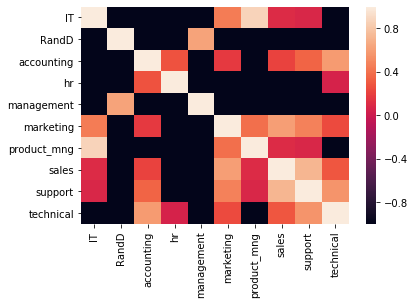

In [6]:
# 画出p值的图，黑色部分表示部门和部门有显著性差异，其他色表示部门和部门没有显著性差异
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)
plt.show()

使用透视表方法

In [7]:
piv_tb = pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],
                        columns=['Work_accident'],aggfunc=np.mean)
piv_tb

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

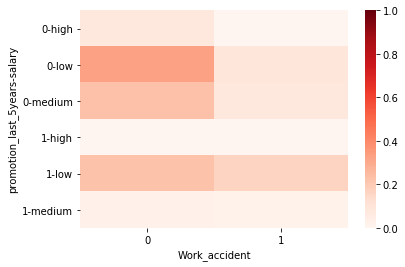

In [8]:
# 画出透视表,颜色越深，离职率越高
sns.heatmap(piv_tb,vmin=0,vmax=1,cmap=sns.color_palette('Reds',n_colors=256))
plt.show()

## 分组分析

通过绘制柱状图，直观的了解到分组情况

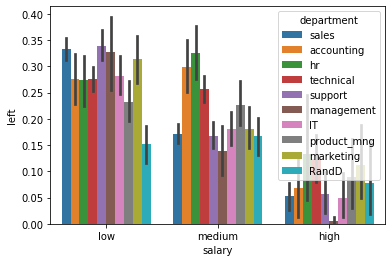

In [9]:
# 关注值为left，向下钻取：向下根据部门department钻取
sns.barplot(x='salary',y='left',hue='department',data=df)
plt.show()

In [10]:
# 看连续值的直方图分布
sl_s = df['satisfaction_level']
# sns.barplot(list(range(len(sl_s))),sl_s.sort_values())
# plt.show()

## 相关分析

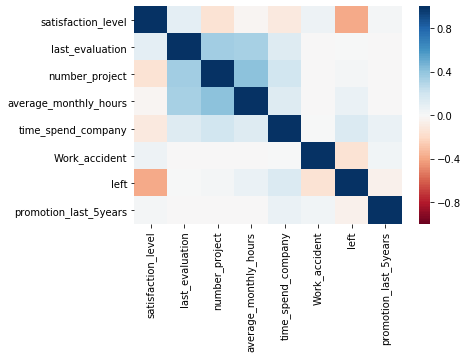

In [11]:
# 直接使用相关系数
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()

离散属性的相关性计算，计算熵、条件熵、互信息、熵增益率、相关性

In [12]:
s1 = pd.Series(['X1','X1','X2','X2','X2','X2'])
s2 = pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

In [13]:
# 计算熵
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    # 得到自身的概率分布，分组-求和-转化为np.array-除以自身长度
    prt_ary = s.groupby(by=s).count().values/float(len(s))
    return -(np.log2(prt_ary) * prt_ary).sum()

getEntropy(s1)

0.9182958340544896

In [14]:
getEntropy(s2)

1.0

In [15]:
# 计算条件熵
def getCondEntropy(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        # 准备一个字典，key为s1的值，value为一个数组，s1值下s2的分布
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(s1)) for k in d])

getCondEntropy(s1,s2)

0.5408520829727552

In [16]:
getCondEntropy(s2,s1)

0.4591479170272448

In [17]:
# 计算互信息
def getEntropyGain(s1,s2):
    return getEntropy(s2) - getCondEntropy(s1,s2)

getEntropyGain(s1,s2)

0.4591479170272448

In [18]:
getEntropyGain(s2,s1)

0.4591479170272448

In [19]:
# 计算增益率
def getEntropyGainRatio(s1,s2):
    return getEntropyGain(s1,s2) / getEntropy(s2)

getEntropyGainRatio(s1,s2)

0.4591479170272448

In [20]:
getEntropyGainRatio(s2,s1)

0.5

In [21]:
# 计算离散值的相关性
import math
def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2) / math.sqrt(getEntropy(s1) * getEntropy(s2))

getDiscreteCorr(s1,s2)

0.4791387674918639

In [22]:
getDiscreteCorr(s2,s1)

0.4791387674918639

计算基尼系数

In [23]:
# 求概率平方和
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    # 得到自身的概率分布，分组-求和-转化为np.array-除以自身长度
    prt_ary = s.groupby(by=s).count().values/float(len(s))
    return sum(prt_ary**2)

# 计算Gini
def getGini(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        # 准备一个字典，key为s1的值，value为一个数组，s1值下s2的分布
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return 1-sum([getProbSS(d[k]) * len(d[k]) / float(len(s1)) for k in d])

getGini(s1,s2)

0.25

In [24]:
getGini(s2,s1)

0.2222222222222222

## 因子分析（成分分析）

In [25]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=7)
# PCA降维，删除离散的属性
lower_mat = mypca.fit_transform(df.drop(labels=['salary','department','left'],axis=1))

# 重要性存在的比例
mypca.explained_variance_ratio_

array([9.98565340e-01, 8.69246970e-04, 4.73865973e-04, 4.96932182e-05,
       2.43172315e-05, 9.29496619e-06, 8.24128218e-06])

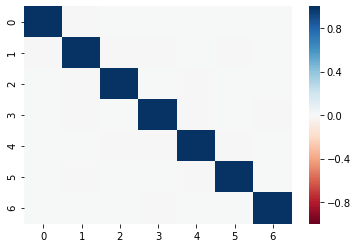

In [26]:
# 绘制相关图,PCA把原来的特征空间变成了正交的特征空间
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()